In [3]:
%load_ext autoreload
%autoreload 2

# Setup Environment
import sys
import os
ROOT = '../../'
sys.path.append(ROOT)

import gym
from gym.spaces import Discrete
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.agents.mc_on_policy_agent import OnPolicyMonteCarloAgent
from source.utils import *

test_on_policy_monte_carlo_agent passed!


In [6]:
def play_episode(policy: np.array, env: gym.Env):
  prev_state, _ = env.reset()
  terminal = False
  episode = []
  while not terminal:
    action = np.random.choice(len(policy[prev_state]), p = policy[prev_state])
    state, reward, terminal, truncated, info = env.step(action)
    episode.append((prev_state, action, reward))
    prev_state = state
  return episode


In [9]:
### On policy learning ###
# Create Environment.
#env = gym.make('Taxi-v3')
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
directory = './video'
agent = OnPolicyMonteCarloAgent(
  state_space=env.observation_space, 
  action_space=env.action_space, 
  discount_rate=0.8,
  epsilon=0.1
)
max_episode = 1000
rewarding = 0
for i in tqdm(range(max_episode)):
  episode = play_episode(agent._policy, env)
  if (episode[-1][2] > 0):
    rewarding += 1
  agent.update(episode)
print(f"rewarding episodes {rewarding}")

100%|██████████| 1000/1000 [00:00<00:00, 3046.57it/s]

rewarding episodes 856


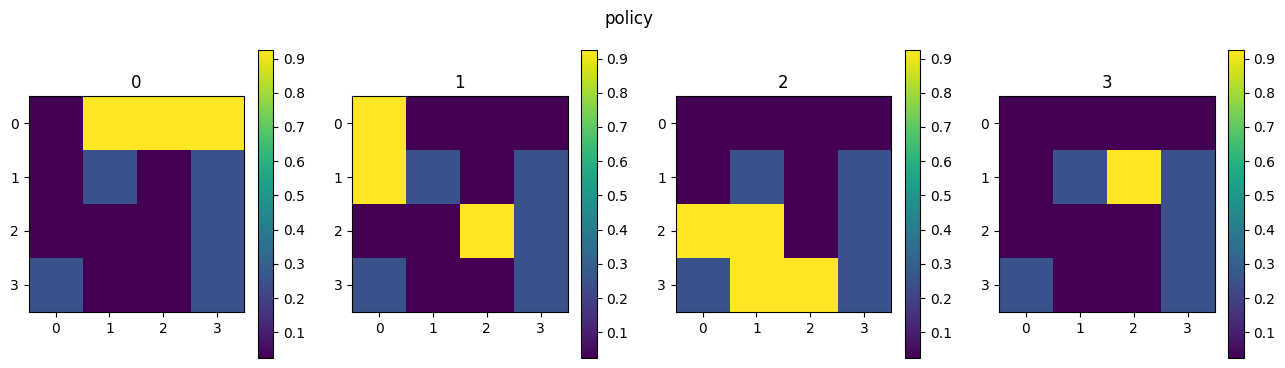

In [11]:
# Plot the action values.
# cliff walking
#shape = (4,12,4)
# frozen lake
## small
shape = (4,4,4)
## large
#shape = (8,8,4)

action_values = agent._policy.reshape(shape)
num_actions = action_values.shape[-1]
plt.figure(1, figsize=(16,4))
plt.suptitle("policy")
for i in range(num_actions):
  plt.subplot(1, num_actions,i+1)
  plt.title(i)
  plt.imshow(action_values[:,:,i])
  plt.colorbar(orientation='vertical')



# Summary

## Monte Carlo On policy learning 
Overall a very unefficient algorithm, can only solve small scale problems in a short time. The update on policy and action value only happens when there are rewards in the entire episode. 

As an on policy learning algorithm, the policy is never "optimal" because it needs to keep exploring.  

## Contexual Bandit

Contextual bandit is able to map situation to actions. However as shown by the cliff walking example, contextual bandit makes the assumption about the **problem** that action only affect immediate reward, but not the future rewards. 

Due to this assumption, contextual bandit only learn from immediate reward, not the future ones, making it unsuitable to solve the cliff walking problem. 

The steady state of the action values will be -1 unless the action leads to going off the cliff. (on the cliff, the values are -1 for up, right, left and -100 for down). This helps the agent to stay away from the cliff but doesn't maximize the total reward by reaching the goal faster. 

In order to learn from future reward, the agent needs to learn from the sum of the rewards of the entire episode, rather then immediate reward. This leads to DP, Monte Carlo method or TD. 

